#### Historical weather data from São Carlos, São Paulo, Brazil.
##### Years: 2010 to 2019.
##### Data source: National Weather Institute (http://www.inmet.gov.br)
##### I used this database in my master's degree in Transportation Systems Planning, at the University of São Paulo (USP).
##### Master's Dissertation available from: https://teses.usp.br/teses/disponiveis/18/18144/tde-07072016-200409/en.php

In [1]:
# Importing the database generated from the "WeatherNaN_Database" notebook.

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:,.1f}".format

NewData = pd.read_csv('_New2010-2019_withNaN_MinTemp.csv')

print(NewData)
print('')
print(NewData.describe())

            Date  Year  Season  Rain (mm)  Max Temp (°C)  Min Temp (°C)
0     2010-01-01  2010  Summer        0.4           29.5           19.6
1     2010-01-02  2010  Summer       11.6           29.0           19.8
2     2010-01-03  2010  Summer        0.2           31.3           19.5
3     2010-01-04  2010  Summer        0.0           31.2           20.0
4     2010-01-05  2010  Summer        0.0           31.1           21.1
...          ...   ...     ...        ...            ...            ...
3647  2019-12-27  2019  Summer        0.0           32.2           19.7
3648  2019-12-28  2019  Summer        9.0           32.1           20.6
3649  2019-12-29  2019  Summer        0.0           31.3           19.8
3650  2019-12-30  2019  Summer        0.0           30.3           20.2
3651  2019-12-31  2019  Summer        0.8           31.0           20.8

[3652 rows x 6 columns]

         Year  Rain (mm)  Max Temp (°C)  Min Temp (°C)
count 3,652.0    3,369.0        3,495.0        3,495.0


In [2]:
# Interpolating the NaN values and comparing with the previous descriptive statistics.

NewData = NewData.interpolate()
print(NewData.describe())

         Year  Rain (mm)  Max Temp (°C)  Min Temp (°C)
count 3,652.0    3,652.0        3,652.0        3,652.0
mean  2,014.5        3.9           27.3           16.5
std       2.9        9.9            3.5            3.2
min   2,010.0        0.0           11.3            1.8
25%   2,012.0        0.0           25.0           14.3
50%   2,014.5        0.0           27.5           17.2
75%   2,017.0        2.0           29.8           19.1
max   2,019.0      116.6           37.2           23.4


In [3]:
# Defining some classifications for maximum temperature and rain according to the percentiles.

RainClass = []
for rain in NewData['Rain (mm)']:
    if rain == 0.0:
        RainClass.append('No rain')
    if 0.0 < rain <= NewData['Rain (mm)'].quantile(0.75):
        RainClass.append('Light rain')
    if rain > NewData['Rain (mm)'].quantile(0.75):
        RainClass.append('Heavy rain')
NewData['Rain Class'] = RainClass

TempClass = []
for temp in NewData['Max Temp (°C)']:
    if temp < NewData['Max Temp (°C)'].quantile(0.25):
        TempClass.append('Cold')
    if NewData['Max Temp (°C)'].quantile(0.25) <= temp <= NewData['Max Temp (°C)'].quantile(0.75):
        TempClass.append('Mild')
    if temp > NewData['Max Temp (°C)'].quantile(0.75):
        TempClass.append('Warm')
NewData['Temp Class'] = TempClass

NewData

,Date,Year,Season,Rain (mm),Max Temp (°C),Min Temp (°C),Rain Class,Temp Class
0,2010-01-01,2010,Summer,0.4,29.5,19.6,Light rain,Mild
1,2010-01-02,2010,Summer,11.6,29.0,19.8,Heavy rain,Mild
2,2010-01-03,2010,Summer,0.2,31.3,19.5,Light rain,Warm
3,2010-01-04,2010,Summer,0.0,31.2,20.0,No rain,Warm
4,2010-01-05,2010,Summer,0.0,31.1,21.1,No rain,Warm
...,...,...,...,...,...,...,...,...
3647,2019-12-27,2019,Summer,0.0,32.2,19.7,No rain,Warm
3648,2019-12-28,2019,Summer,9.0,32.1,20.6,Heavy rain,Warm
3649,2019-12-29,2019,Summer,0.0,31.3,19.8,No rain,Warm
3650,2019-12-30,2019,Summer,0.0,30.3,20.2,No rain,Warm


In [4]:
# Creating a column of the day of the week and month.

NewData['Date'] = pd.date_range(start='2010-1-1', end='2019-12-31', freq='D')

NewData['Day'] = NewData['Date'].dt.day_name()
NewData['Month'] = pd.to_datetime(NewData['Date']).dt.strftime('%m')
NewData['Month'] += pd.to_datetime(NewData['Date']).dt.strftime('%b')

NewData = NewData[['Date','Day','Month','Year','Season','Rain (mm)','Max Temp (°C)','Min Temp (°C)',
                   'Rain Class','Temp Class']]

print(NewData.dtypes)
NewData

Date             datetime64[ns]
Day                      object
Month                    object
Year                      int64
Season                   object
Rain (mm)               float64
Max Temp (°C)           float64
Min Temp (°C)           float64
Rain Class               object
Temp Class               object
dtype: object


,Date,Day,Month,Year,Season,Rain (mm),Max Temp (°C),Min Temp (°C),Rain Class,Temp Class
0,2010-01-01,Friday,01Jan,2010,Summer,0.4,29.5,19.6,Light rain,Mild
1,2010-01-02,Saturday,01Jan,2010,Summer,11.6,29.0,19.8,Heavy rain,Mild
2,2010-01-03,Sunday,01Jan,2010,Summer,0.2,31.3,19.5,Light rain,Warm
3,2010-01-04,Monday,01Jan,2010,Summer,0.0,31.2,20.0,No rain,Warm
4,2010-01-05,Tuesday,01Jan,2010,Summer,0.0,31.1,21.1,No rain,Warm
...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,Friday,12Dec,2019,Summer,0.0,32.2,19.7,No rain,Warm
3648,2019-12-28,Saturday,12Dec,2019,Summer,9.0,32.1,20.6,Heavy rain,Warm
3649,2019-12-29,Sunday,12Dec,2019,Summer,0.0,31.3,19.8,No rain,Warm
3650,2019-12-30,Monday,12Dec,2019,Summer,0.0,30.3,20.2,No rain,Warm


In [5]:
# Creating dummy variables of the classifications.

NewData['No rain'] = 0
NewData['Light rain'] = 0
NewData['Heavy rain'] = 0
NewData['Cold'] = 0
NewData['Mild'] = 0
NewData['Warm'] = 0

for i in range(len(NewData)):
    if NewData['Rain Class'].iloc[i] == 'No rain':
        NewData['No rain'].iloc[i] = 1
    if NewData['Rain Class'].iloc[i] == 'Light rain':
        NewData['Light rain'].iloc[i] = 1
    if NewData['Rain Class'].iloc[i] == 'Heavy rain':
        NewData['Heavy rain'].iloc[i] = 1
    if NewData['Temp Class'].iloc[i] == 'Cold':
        NewData['Cold'].iloc[i] = 1
    if NewData['Temp Class'].iloc[i] == 'Mild':
        NewData['Mild'].iloc[i] = 1
    if NewData['Temp Class'].iloc[i] == 'Warm':
        NewData['Warm'].iloc[i] = 1

NewData['Total Days'] = 0
NewData['Prob'] = 0

for i in NewData.index:
  for col in range(10,13):
    NewData['Total Days'].iloc[i] += NewData.iloc[i,col]
        
NewData

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Date,Day,Month,Year,Season,Rain (mm),Max Temp (°C),Min Temp (°C),Rain Class,Temp Class,No rain,Light rain,Heavy rain,Cold,Mild,Warm,Total Days,Prob
0,2010-01-01,Friday,01Jan,2010,Summer,0.4,29.5,19.6,Light rain,Mild,0,1,0,0,1,0,1,0
1,2010-01-02,Saturday,01Jan,2010,Summer,11.6,29.0,19.8,Heavy rain,Mild,0,0,1,0,1,0,1,0
2,2010-01-03,Sunday,01Jan,2010,Summer,0.2,31.3,19.5,Light rain,Warm,0,1,0,0,0,1,1,0
3,2010-01-04,Monday,01Jan,2010,Summer,0.0,31.2,20.0,No rain,Warm,1,0,0,0,0,1,1,0
4,2010-01-05,Tuesday,01Jan,2010,Summer,0.0,31.1,21.1,No rain,Warm,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,Friday,12Dec,2019,Summer,0.0,32.2,19.7,No rain,Warm,1,0,0,0,0,1,1,0
3648,2019-12-28,Saturday,12Dec,2019,Summer,9.0,32.1,20.6,Heavy rain,Warm,0,0,1,0,0,1,1,0
3649,2019-12-29,Sunday,12Dec,2019,Summer,0.0,31.3,19.8,No rain,Warm,1,0,0,0,0,1,1,0
3650,2019-12-30,Monday,12Dec,2019,Summer,0.0,30.3,20.2,No rain,Warm,1,0,0,0,0,1,1,0


In [6]:
# I was thinking... 
# Sometimes seems to me that rains more on the weekend.
# Is the weekend more likely to rain than the rest of the week!?
# I know it doesn't make sense, but for me seems like that rains more on the weekend...

pd.options.display.float_format = "{:,.2f}".format

NewDataSaturday = NewData.groupby(['Day'], as_index=False)['No rain','Light rain','Heavy rain','Cold','Mild','Warm','Total Days','Prob'].sum()

prob_NewDataSaturday = NewDataSaturday.copy()
for i in range(1,7):
    prob_NewDataSaturday.iloc[:,i] = (prob_NewDataSaturday.iloc[:,i] / 
                                      prob_NewDataSaturday.iloc[:,7])
prob_NewDataSaturday['Prob'] = 1     

probSaturday = pd.concat([NewDataSaturday,prob_NewDataSaturday])

prob_NewDataSaturday

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Day,No rain,Light rain,Heavy rain,Cold,Mild,Warm,Total Days,Prob
0,Friday,0.65,0.13,0.22,0.24,0.50,0.26,522,1
1,Monday,0.61,0.14,0.25,0.25,0.51,0.25,522,1
2,Saturday,0.60,0.15,0.25,0.23,0.52,0.25,522,1
3,Sunday,0.61,0.14,0.25,0.23,0.54,0.23,522,1
4,Thursday,0.63,0.13,0.24,0.23,0.53,0.24,521,1
5,Tuesday,0.61,0.15,0.25,0.26,0.49,0.24,522,1
6,Wednesday,0.61,0.15,0.24,0.26,0.49,0.25,521,1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


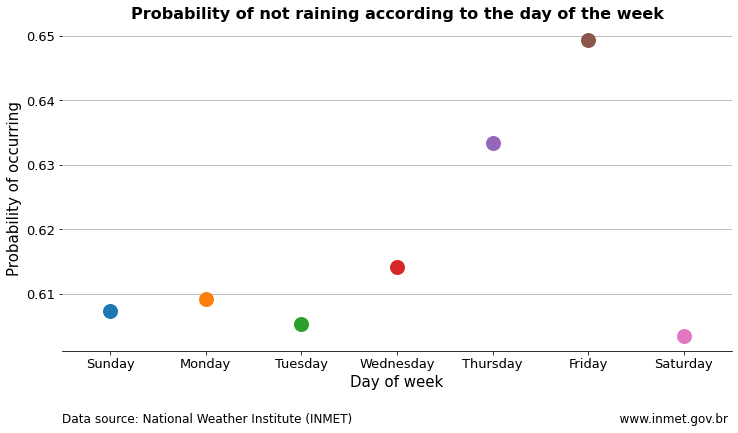

In [7]:
# That's amazing! For the city of São Carlos, based on data from 2010 to 2019, 
# the probability of not raining is lowest on Saturday!
# But sometimes emotion and graphics scale can be deceiving!
# If we pay attention, the difference between the probabilities is very small between the days, 
# but the graph gives the impression that the difference is huge.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

ax = sns.swarmplot(x='Day', y='No rain', data=prob_NewDataSaturday, size=15, order=days)

ax.axes.set_title('Probability of not raining according to the day of the week', fontsize=16, weight='bold')
ax.set_xlabel('Day of week', fontsize=15)
ax.set_ylabel('Probability of occurring', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=0.59, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

plt.show()

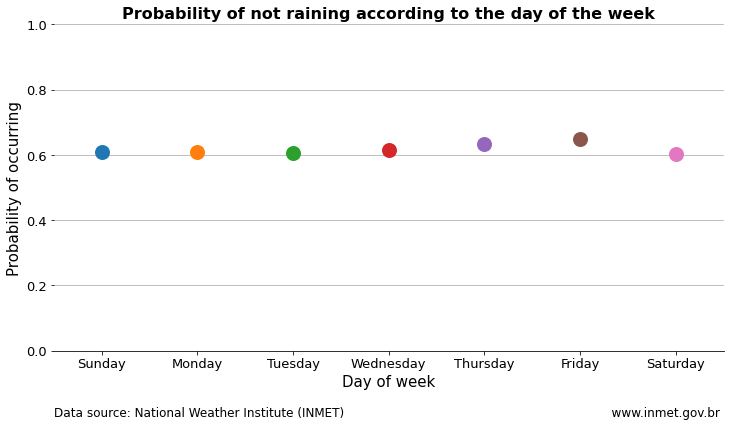

In [8]:
# Here we have a more honest scale (:

plt.figure(figsize=(12,6))

days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

ax = sns.swarmplot(x='Day', y='No rain', data=prob_NewDataSaturday, size=15, order=days)

ax.axes.set_title('Probability of not raining according to the day of the week', fontsize=16, weight='bold')
ax.set_xlabel('Day of week', fontsize=15)
ax.set_ylabel('Probability of occurring', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-0.2, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

plt.ylim(0, 1)

plt.show()

In [9]:
# Estimating the probabilities by months.

NewDataMonth = NewData.groupby(['Month'], as_index=False)['No rain','Light rain','Heavy rain','Cold','Mild','Warm','Total Days','Prob'].sum()

prob_NewDataMonth = NewDataMonth.copy()
for i in range(1,7):
    prob_NewDataMonth.iloc[:,i] = (prob_NewDataMonth.iloc[:,i] / 
                                      prob_NewDataMonth.iloc[:,7])
prob_NewDataMonth['Prob'] = 1     

probMonth = pd.concat([NewDataMonth,prob_NewDataMonth])

prob_NewDataMonth

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,No rain,Light rain,Heavy rain,Cold,Mild,Warm,Total Days,Prob
0,01Jan,0.39,0.17,0.44,0.15,0.45,0.41,310,1
1,02Feb,0.44,0.18,0.38,0.09,0.51,0.40,282,1
2,03Mar,0.40,0.19,0.41,0.11,0.65,0.23,310,1
3,04Apr,0.61,0.21,0.19,0.19,0.67,0.14,300,1
4,05May,0.71,0.17,0.12,0.47,0.52,0.00,310,1
5,06Jun,0.80,0.11,0.10,0.57,0.43,0.00,300,1
6,07Jul,0.91,0.05,0.04,0.50,0.50,0.00,310,1
7,08Aug,0.89,0.05,0.06,0.26,0.59,0.15,310,1
8,09Sep,0.75,0.11,0.14,0.17,0.36,0.47,300,1
9,10Oct,0.61,0.15,0.25,0.16,0.40,0.44,310,1


In [10]:
# Reshaping the table of probabilities by months to generate some graphs.

tempprob = []
rainprob = []
tempclass = []
rainclass = []
month = (prob_NewDataMonth[['Month']*3])
month2 = []

for i in range(0,3):
  for z in range(0,12):
    month2.append(month.iloc[z,i])
for i in range(4,7):
  for z in range(0,12):
    tempprob.append(prob_NewDataMonth.iloc[z,i])
for i in range(1,4):
  for z in range(0,12):
    rainprob.append(prob_NewDataMonth.iloc[z,i])
for i in range(0,12):
  tempclass.append('Cold')
for i in range(12,24):
  tempclass.append('Mild')
for i in range(24,36):
  tempclass.append('Warm')
for i in range(0,12):
  rainclass.append('No rain')
for i in range(12,24):
  rainclass.append('Light rain')
for i in range(24,36):
  rainclass.append('Heavy rain')

NewData4 = pd.DataFrame({'Month':month2, 'Temp Class':tempclass, 'Temp Class Prob':tempprob, 'Rain Class':rainclass, 'Rain Class Prob':rainprob})

NewData4

,Month,Temp Class,Temp Class Prob,Rain Class,Rain Class Prob
0,01Jan,Cold,0.15,No rain,0.39
1,02Feb,Cold,0.09,No rain,0.44
2,03Mar,Cold,0.11,No rain,0.40
3,04Apr,Cold,0.19,No rain,0.61
4,05May,Cold,0.47,No rain,0.71
5,06Jun,Cold,0.57,No rain,0.80
6,07Jul,Cold,0.50,No rain,0.91
7,08Aug,Cold,0.26,No rain,0.89
8,09Sep,Cold,0.17,No rain,0.75
9,10Oct,Cold,0.16,No rain,0.61


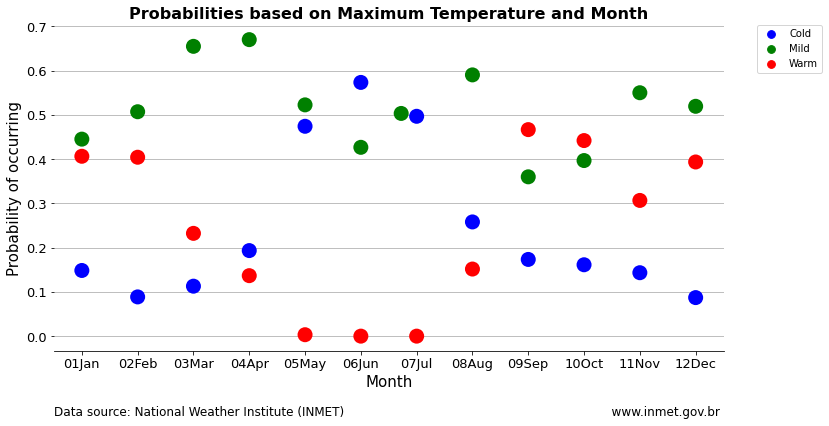

In [11]:
# Graph of the probability of occurring the days according to the temperature classifications generated. 
# Crossed with months.

plt.figure(figsize=(12,6))

color_dict = dict({'Cold':'blue', 'Mild':'green', 'Warm':'red'})

ax = sns.swarmplot(x='Month', y='Temp Class Prob', hue='Temp Class', data=NewData4, 
                   palette=color_dict, size=15)

ax.axes.set_title('Probabilities based on Maximum Temperature and Month', fontsize=16, weight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Probability of occurring', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-0.18, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

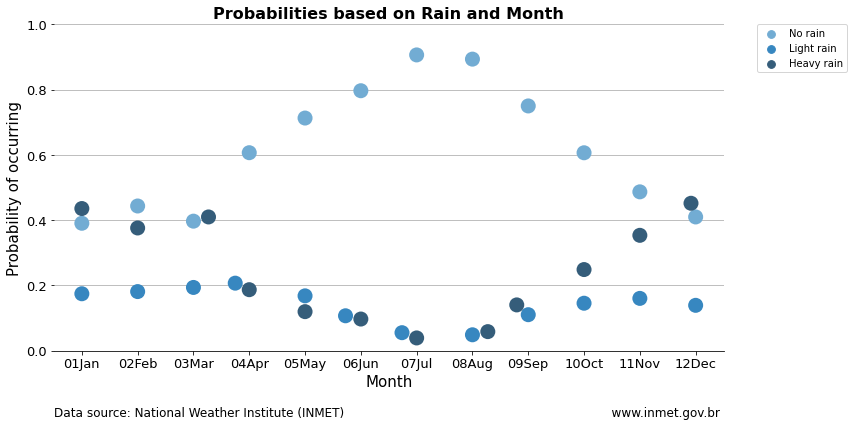

In [12]:
# Graph of the probability of occurring the days according to the rain classifications generated. 
# Crossed with months.
# We can see that the probabilities of days without rain and cold have a very similar trend throughout the year.
# And the probabilities of warm days have a similar trend to the days of heavy rain.

plt.figure(figsize=(12,6))

palette = sns.color_palette('Blues_d',n_colors=3)
palette.reverse()

ax = sns.swarmplot(x='Month', y='Rain Class Prob', hue='Rain Class', data=NewData4, 
                   palette=palette, size=15)

ax.axes.set_title('Probabilities based on Rain and Month', fontsize=16, weight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Probability of occurring', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-0.2, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylim(0, 1)

plt.show()

In [13]:
# Estimating the probabilities by seasons.

NewDataSeason = NewData.groupby(['Season'], as_index=False)['No rain','Light rain','Heavy rain','Cold','Mild','Warm','Total Days','Prob'].sum()

prob_NewDataSeason = NewDataSeason.copy()
for i in range(1,7):
    prob_NewDataSeason.iloc[:,i] = (prob_NewDataSeason.iloc[:,i] / 
                                      prob_NewDataSeason.iloc[:,7])
prob_NewDataSeason['Prob'] = 1     

probSeason = pd.concat([NewDataSeason,prob_NewDataSeason])

prob_NewDataSeason

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Season,No rain,Light rain,Heavy rain,Cold,Mild,Warm,Total Days,Prob
0,Autumn,0.65,0.18,0.17,0.36,0.58,0.07,928,1
1,Spring,0.53,0.14,0.32,0.15,0.47,0.38,899,1
2,Summer,0.39,0.18,0.43,0.12,0.50,0.38,889,1
3,Winter,0.88,0.06,0.07,0.34,0.49,0.16,936,1


In [14]:
# Reshaping the table of probabilities by seasons to generate some graphs.

tempprob = []
rainprob = []
tempclass = []
rainclass = []
season = (prob_NewDataSeason[['Season']*3])
season2 = []

for i in range(0,3):
  for z in range(0,4):
    season2.append(season.iloc[z,i])
for i in range(4,7):
  for z in range(0,4):
    tempprob.append(prob_NewDataSeason.iloc[z,i])
for i in range(1,4):
  for z in range(0,4):
    rainprob.append(prob_NewDataSeason.iloc[z,i])
for i in range(0,4):
  tempclass.append('Cold')
for i in range(4,8):
  tempclass.append('Mild')
for i in range(8,12):
  tempclass.append('Warm')
for i in range(0,4):
  rainclass.append('No rain')
for i in range(4,8):
  rainclass.append('Light rain')
for i in range(8,12):
  rainclass.append('Heavy rain')

NewData3 = pd.DataFrame({'Season':season2, 'Temp Class':tempclass, 'Temp Class Prob':tempprob, 'Rain Class':rainclass, 'Rain Class Prob':rainprob})

NewData3

,Season,Temp Class,Temp Class Prob,Rain Class,Rain Class Prob
0,Autumn,Cold,0.36,No rain,0.65
1,Spring,Cold,0.15,No rain,0.53
2,Summer,Cold,0.12,No rain,0.39
3,Winter,Cold,0.34,No rain,0.88
4,Autumn,Mild,0.58,Light rain,0.18
5,Spring,Mild,0.47,Light rain,0.14
6,Summer,Mild,0.50,Light rain,0.18
7,Winter,Mild,0.49,Light rain,0.06
8,Autumn,Warm,0.07,Heavy rain,0.17
9,Spring,Warm,0.38,Heavy rain,0.32


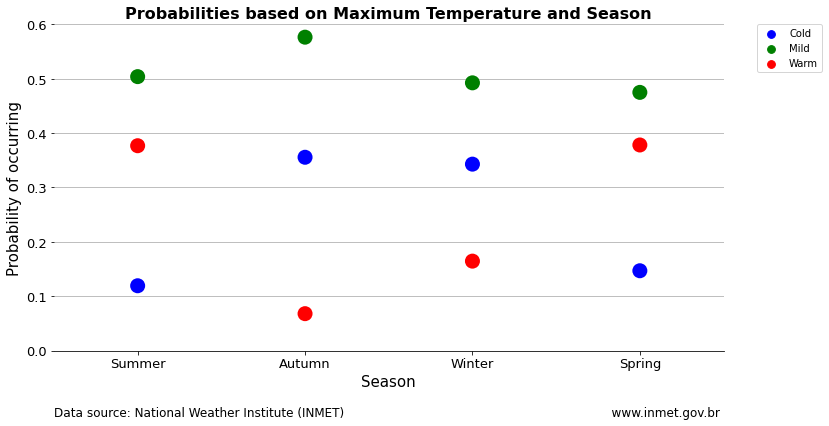

In [15]:
# Graph of the probability of occurring the days according to the temperature classifications generated. 
# Crossed with seasons.

plt.figure(figsize=(12,6))

color_dict = dict({'Cold':'blue', 'Mild':'green', 'Warm':'red'})

seasons = ['Summer','Autumn','Winter','Spring']

ax = sns.swarmplot(x='Season', y='Temp Class Prob', hue='Temp Class', data=NewData3, order=seasons, 
                   palette=color_dict, size=15)

ax.axes.set_title('Probabilities based on Maximum Temperature and Season', fontsize=16, weight='bold')
ax.set_xlabel('Season', fontsize=15)
ax.set_ylabel('Probability of occurring', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-0.12, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylim(0, 0.6)

plt.show()

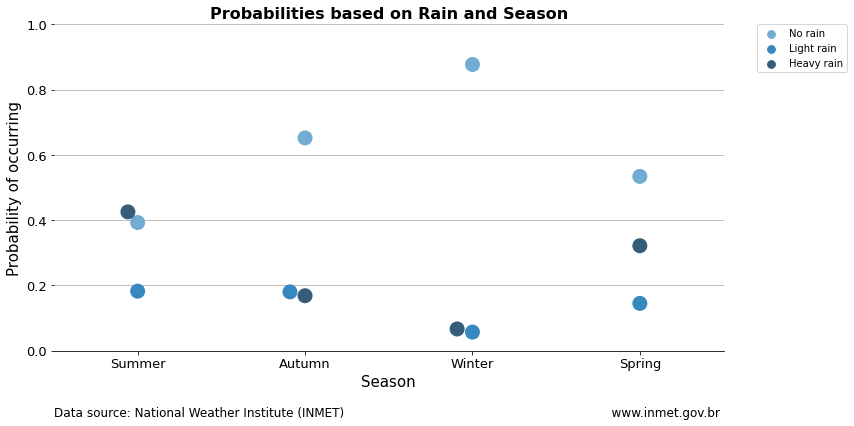

In [16]:
# Graph of the probability of occurring the days according to the rain classifications generated. 
# Crossed with seasons.

plt.figure(figsize=(12,6))

palette = sns.color_palette('Blues_d',n_colors=3)
palette.reverse()

ax = sns.swarmplot(x='Season', y='Rain Class Prob', hue='Rain Class', data=NewData3, order=seasons, 
                   palette=palette, size=15)

ax.axes.set_title('Probabilities based on Rain and Season', fontsize=16, weight='bold')
ax.set_xlabel('Season', fontsize=15)
ax.set_ylabel('Probability of occurring', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-0.2, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylim(0, 1)

plt.show()